In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math
import string

In [12]:
from scipy.optimize import brentq

# Figure 1 - negative senescence

92
8.900000000000002
59
0.2


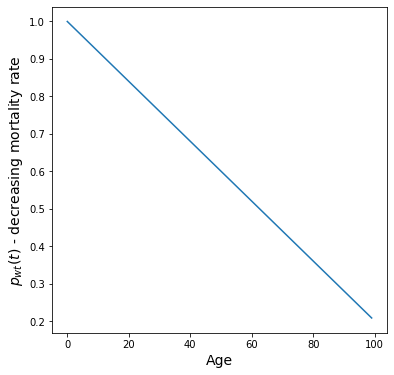

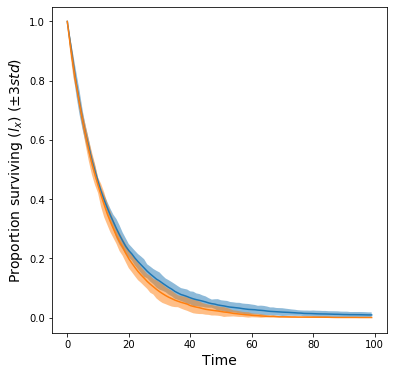

In [6]:
# Assumes a negative linear mortality function that is to multiply with the initial p_wt2

Tmax = 100
nrepeats = 10
nind = 1000
y = np.zeros(Tmax)
p_wt = 0.077
steepness = 0.8

plt.figure(figsize=(6,6))
x = np.arange(0,Tmax,1,dtype = int)
y = 1.0 - steepness*x/Tmax
plt.plot(x,y);
plt.xlabel("Age",fontsize=14);
plt.ylabel("$p_{wt}(t)$ - decreasing mortality rate",fontsize=14); 

plt.figure(figsize=(6,6))
C = np.arange(0,Tmax,1,dtype = int)

# With time-dependent p_wt using y-values from the snippet above
H2_wt = np.zeros((nrepeats,Tmax),dtype = int); 
for k in range(0,nrepeats):
    s = np.ones((Tmax,nind),dtype = int); 
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if (ran < p_wt*y[j]):
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H2_wt[k,:] = np.sum(s, axis = 1)
H2_wt = H2_wt*(1/nind)

mean_wt2 = np.mean(H2_wt,axis = 0)
idx_2 = (np.abs(mean_wt2 - 10/nind)).argmin()
print(idx_2+1)
print(mean_wt2[99]*nind)
plt.plot(C, mean_wt2);
std_H2_wt = np.std(H2_wt,axis = 0)
plt.fill_between(range(Tmax), mean_wt2-3.0*std_H2_wt, mean_wt2+3.0*std_H2_wt, alpha = 0.5);

# With constant p_wt
H1_wt = np.zeros((nrepeats,Tmax),dtype = int); #idx = np.zeros(nrepeats)
for k in range(0,nrepeats):
    s = np.ones((Tmax,nind),dtype = int); 
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H1_wt[k,:] = np.sum(s, axis = 1)
H1_wt = H1_wt*(1/nind)

mean_wt1 = np.mean(H1_wt,axis = 0)
idx_1 = (np.abs(mean_wt1 - 10/nind)).argmin()
print(idx_1+1)
print(mean_wt1[99]*nind)
plt.plot(C,mean_wt1)
std_H1_wt = np.std(H1_wt,axis = 0)
plt.fill_between(range(Tmax), mean_wt1-3.0*std_H1_wt, mean_wt1+3.0*std_H1_wt, alpha = 0.5)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Proportion surviving ($l_x$) ($\pm 3 std$)", fontsize=14);

## Fecundity as a function of age

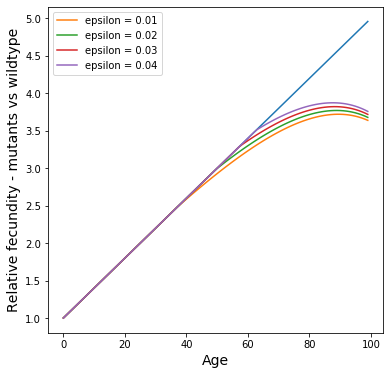

In [190]:
# Calculates fecundity curves as a function of somatic damage. Fertility increases with age.
# deterministic D_mut

alpha = 0.000222 
kappa = 0.033 

epsilon = np.array([0.01, 0.02, 0.03, 0.04])

Tmax = 100; 

mu = 50.0 #Test different values 

C = np.arange(0,Tmax,1,dtype = int)

fec_wt = np.zeros(Tmax)
fec_wt = 1 + 4.0*C/Tmax

plt.figure(figsize=(6,6))
plt.plot(C,fec_wt);
plt.xlabel("Age",fontsize = 14)

fec_mut_all = np.zeros((4,Tmax))
for i in range(4):
    p_mut = np.zeros((Tmax))
    fec_mut = np.ones((Tmax))
    for j in range(0,Tmax):  
            p_mut[j] = (1-epsilon[i])*p_wt*y[j] + alpha*(((1+kappa)**(j+1))-1)
            if p_mut[j]> p_wt*y[j]:
                fec_mut[j] = 1.0-mu*(p_mut[j]-p_wt*y[j])
                if fec_mut[j] <= 0.0:
                    fec_mut[j] = 0.0
            fec_mut[j] = fec_wt[j]*fec_mut[j]
    fec_mut_all[i,:] = fec_mut
    
    plt.plot(C,fec_mut,label = f'epsilon = {epsilon[i]}')
    
plt.legend()
#plt.xlabel("Time",fontsize = 14)
plt.ylabel("Relative fecundity - mutants vs wildtype",fontsize=14);
#plt.savefig('RA_fig5B.png', dpi = 600);

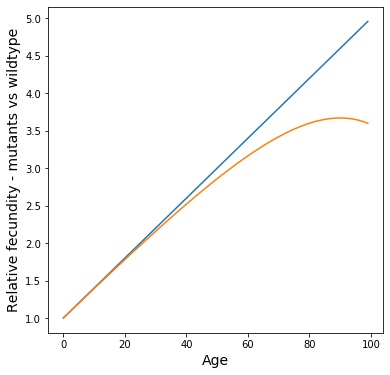

In [133]:
# Alternative way to calculate fecundity as a function of somatic damage. Using the damage term only

alpha = 0.000222 
kappa = 0.033 

epsilon = np.array([0.01, 0.02, 0.03, 0.04])

Tmax = 100; 

mu = 50.0 #Test different values 

C = np.arange(0,Tmax,1,dtype = int)

fec_wt = np.zeros(Tmax)
fec_wt = 1 + 4.0*C/Tmax

plt.figure(figsize=(6,6))
plt.plot(C,fec_wt);
plt.xlabel("Age",fontsize = 14)

fec_mut_all = np.zeros((4,Tmax))

p_mut = np.zeros((Tmax))
fec_mut = np.ones((Tmax))
for j in range(0,Tmax):  
    fec_mut[j] = 1.0-mu*alpha*(((1+kappa)**(j+1))-1)
    fec_mut[j] = fec_wt[j]*fec_mut[j]

#plt.plot(C,fec_mut,label = f'epsilon = {epsilon[i]}')
plt.plot(C,fec_mut)    
#plt.legend()
plt.ylabel("Relative fecundity - mutants vs wildtype",fontsize=14);
#plt.savefig('RA_fig5B.png', dpi = 600);

More correct to use this version as the somatic damage accumulation is equal for all four epsilon levels, and fecundity is a function of somatic damage

In [134]:
fec_mut

array([0.9996337 , 1.03922552, 1.07877359, 1.11827594, 1.15773054,
       1.19713524, 1.23648785, 1.27578605, 1.31502745, 1.35420953,
       1.39332969, 1.43238523, 1.47137332, 1.51029102, 1.54913526,
       1.58790287, 1.62659052, 1.66519477, 1.70371202, 1.74213854,
       1.78047044, 1.81870366, 1.85683399, 1.89485706, 1.9327683 ,
       1.97056296, 2.00823612, 2.04578263, 2.08319716, 2.12047415,
       2.15760782, 2.19459217, 2.23142093, 2.26808762, 2.30458546,
       2.34090744, 2.37704624, 2.41299425, 2.44874358, 2.48428602,
       2.519613  , 2.55471566, 2.58958477, 2.62421072, 2.65858353,
       2.69269284, 2.72652786, 2.7600774 , 2.7933298 , 2.82627297,
       2.85889432, 2.89118078, 2.92311878, 2.95469419, 2.98589235,
       3.01669801, 3.04709535, 3.0770679 , 3.10659857, 3.13566961,
       3.16426256, 3.19235825, 3.21993677, 3.24697743, 3.27345874,
       3.29935839, 3.32465318, 3.34931905, 3.37333097, 3.39666297,
       3.41928806, 3.44117824, 3.46230439, 3.48263629, 3.50214

## Diffence in cohort survivorship

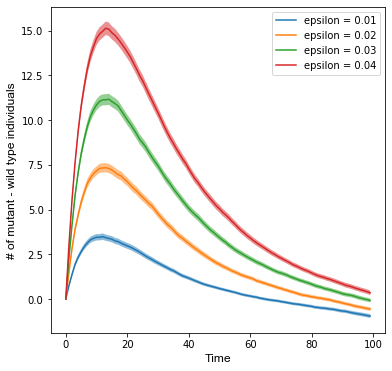

In [96]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# - alternative strategy where both mutant and the wildtype uses the same ran value, such that one can 
# calculate a meaningful standard deviation for this difference 
Tmax = 100
nind = 1000
nrepeats = 1000 #10000

alpha = 0.000222
kappa = 0.033

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt = 0.077

H1_mut_all = np.zeros((4*nrepeats,Tmax))
H1_wt_all = np.zeros((4*nrepeats,Tmax))
diff_mutwt = np.zeros((nrepeats,Tmax))

counter1 = 0
counter2 = 0

C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

for m in range(4):
    H1_mut = np.zeros((nrepeats,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        counter1 = counter1 + 1
        counter2 = counter2 + 1
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt*y[j] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt*y[j]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
        H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)
    
        diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    
    ax.plot(C,mean_diff,label = f'epsilon = {epsilon[m]}')
    ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5) 

ax.legend()
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

#fig.tight_layout()

#figure = plt.gcf()
#figure.set_size_inches(3.42, 3.42)
#plt.savefig('RA_fig2_Homarus.pdf', dpi = 600, bbox_inches="tight");

In [98]:
np.save('H1_wt_all_1000_Homarus.npy', H1_wt_all)
np.save('H1_mut_all_1000_Homarus.npy', H1_mut_all)

In [100]:
H1_wt_all_mean.shape

(1000, 100)

## R0 and r calculations for negative senescence

In [103]:
H1_wt_all = np.load('H1_wt_all_10000_Homarus.npy')
#H1_mut_all = np.load('H1_mut_all_1000_Homarus.npy')
print(H1_wt_all.shape)
print(H1_mut_all.shape)
print(np.shape(H1_wt_all))

(4000, 100)
(4000, 100)
(4000, 100)


In [193]:
# Calculate r and R0 values for wild type and mutant for the four epsilon values
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 1000 for three different epsilon values

#from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
nrepeats = 1000 #NB: remember change 
x = np.linspace(1, int(Tmax), 1)
C = np.arange(0,Tmax,1,dtype = int)

num_eggs = 1 #6000 #1

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations wild type           
R0_wt = np.zeros(nrepeats)
r_wt = np.zeros(nrepeats)

# Fecundity functions wild type
# Every fourth time point has a birth term
for i in range(0,Tmax):
    if(i % 4 != 0):
        fec_wt[i] = 0.0
fec_wt = num_eggs*fec_wt #fec_wt goes from 1 to 5

m_wt = np.zeros((4*nrepeats,Tmax))

for s in range(4*nrepeats):
    m_wt[s,:] = fec_wt[:]

f_wt = np.multiply(H1_wt_all*(1/nind),m_wt)

# Calculate mean, std and sem for R0 and r for wild type
for i in range(nrepeats):
    R0_wt[i] = np.sum(f_wt[i,:])
    
    a, b = -2, 8 
    f = f_wt[i,:]
    r = brentq(func, a, b)
    r_wt[i] = r
    

# Calculate mean, std and sem for R0 and r for nrepeats cases for wildtype
mean_R0_wt = np.mean(R0_wt)
std_R0_wt = np.std(R0_wt)
sem_R0_wt = np.std(R0_wt)/math.sqrt(nrepeats)
mean_r_wt = np.mean(r_wt)
std_r_wt = np.std(r_wt)
sem_r_wt = np.std(r_wt)/math.sqrt(nrepeats)


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
R0_mut = np.zeros(4*nrepeats)
r_mut = np.zeros(4*nrepeats)
m_mut = np.zeros((4*nrepeats,Tmax))

mean_R0_mut = np.zeros(4)
std_R0_mut = np.zeros(4)
sem_R0_mut = np.zeros(4)
mean_r_mut = np.zeros(4)
std_r_mut = np.zeros(4)
sem_r_mut = np.zeros(4)

# Fecundity functions mutant
# Every fourth time point has a birth term
for i in range(0,Tmax):
    if(i % 4 != 0):
        fec_mut[i] = 0.0
fec_mut = num_eggs*fec_mut #fec_wt goes from 1 to 5

for s in range(4*nrepeats):
    m_mut[s,:] = fec_mut[:]
f_mut = np.multiply(H1_mut_all*(1/nind),m_mut)


# Calculate mean, std and sem for R0 and r for the mutant 
# Calculate R0 and r for all instances
for i in range(4*nrepeats):
    R0_mut[i] = np.sum(f_mut[i,:])
    
    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(4):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)

    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#Matplotlib's default ten color circles: {‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’}. This is the color used sequentially in matplotlib plots by default.
# https://matplotlib.org/3.1.1/users/dflt_style_changes.html
#https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    
#Plotting figure
y1_pos = [0]
y2_pos = [1,2,3,4]
y3_pos = [5]
y4_pos = [6,7,8,9]
#y5_pos = [2,7]
y5_pos = [0,2.5,5,7.5]
y6_pos = [5]

#plt.figure(figsize=(6,6))
fig,ax1 = plt.subplots(figsize=(6,6))

ax1.bar(y1_pos,mean_R0_wt,yerr=sem_R0_wt, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');

ax1.set_ylabel('R0',fontsize=14);
ax1.set_ylim(0.96*mean_R0_wt,1.035*mean_R0_wt)

ax2 = ax1.twinx()

ax2.bar(y3_pos,mean_r_wt,yerr=sem_r_wt, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y4_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');

ax2.set_ylabel('r ',fontsize=14);
ax2.set_ylim(0.98*mean_r_wt,1.019*mean_r_wt)

ax2.set_xticks(y5_pos);
#ax2.set_xticklabels(,['$R_0$: swt vs mut','$r$: swt vs mut'],fontsize = 12);
ax2.set_xticklabels(['wt','mutant($\epsilon$)','wt','mutant($\epsilon$)'],fontsize = 12);
#ax2.xaxis.set_ticks([])

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
#plt.savefig('RA_fig1_Homarus.pdf', dpi = 600, bbox_inches="tight");

ValueError: f(a) and f(b) must have different signs

In [ ]:
#NOT USED
#Take the mean of the 4 nrepeats replicates made in the snippet above
#H1_wt_all_mean = np.empty((nrepeats,100))
#for i in range(0, nrepeats):
    #H1_wt_all_mean[i] = H1_wt_all[i::nrepeats].mean(axis=0)

In [182]:
mean_r_wt

1.8703851207747044

In [183]:
mean_R0_wt

6.49855268

In [184]:
mean_r_mut

array([1.85295836, 1.86947797, 1.88397897, 1.90069451])

In [185]:
mean_R0_mut

array([6.38548413, 6.49191676, 6.58710755, 6.69778045])

In [186]:
(1.9006-1.87)/1.87

0.01636363636363634

In [187]:
(6.6977-6.498)/6.498

0.030732533087103723